<a href="https://colab.research.google.com/github/Lucasdbvd/RFM-Marketing-Analysis/blob/main/Desafio_5_Prepare_seu_dataset_para_modelagem_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desenvolvimento do Projeto

Este projeto consiste em aplicar os conhecimentos de limpeza e organização de dados (data cleaning & data wrangling) para estruturar uma base de
dados para modelagem.

No caso do projeto, uma empresa do ramo de e-commerce deseja levantar os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.
Para isso, é disponibilizado uma base de dados com intuito de construir um
código em Python e exportar em csv, porém contendo apenas a identificação do cliente e métricas RFM.

Veremos o passo a passo do desenvolvimento deste projeto.



In [1]:
# Subindo ao servidor o dataset
from google.colab import files
upload = files.upload()

Saving data.csv to data.csv


In [195]:
# Importando as bibliotecas que serão usadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Etapa 01 - Ler o arquivo e inspecionar os dados


In [196]:
# Lendo o arquivo, visualizando e inspecionando tipos e condições dos dados
data = pd.read_csv('data.csv', encoding_errors='ignore')

In [197]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [199]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#Etapa 02 - Valores faltantes na identificação do cliente


In [200]:
# Verificando o peso em porcentagem dos vaores faltantes e excluindo os mesmos
data.isna().sum() / data.count() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.269033
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     33.203139
Country         0.000000
dtype: float64

In [201]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


#Etapa 03 - Preços unitários e quantidade de produtos iguais ou inferior a 0

In [202]:
# Verificando dados não lógicos (preços e quantidades zerados ou negativos)
# e eliminando
data.query('UnitPrice <= 0 | Quantity <= 0').sort_values(by='UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
314748,564651,21786,POLKADOT RAIN HAT,144,8/26/2011 14:19,0.00,14646.0,Netherlands
298054,562973,23157,SET OF 6 NATIVITY MAGNETS,240,8/11/2011 11:42,0.00,14911.0,EIRE
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.00,13113.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.00,13239.0,United Kingdom
439361,574469,22385,JUMBO BAG SPACEBOY DESIGN,12,11/4/2011 11:55,0.00,12431.0,Australia
...,...,...,...,...,...,...,...,...
422375,C573079,M,Manual,-2,10/27/2011 14:15,4161.06,12536.0,France
268027,C560372,M,Manual,-1,7/18/2011 12:26,4287.63,17448.0,United Kingdom
173391,C551699,M,Manual,-1,5/3/2011 14:12,6930.00,16029.0,United Kingdom
173277,C551685,POST,POSTAGE,-1,5/3/2011 12:51,8142.75,16029.0,United Kingdom


In [203]:
data = data.query('UnitPrice > 0 & Quantity > 0')
data.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#Etapa 04 - Verificar se existem linhas duplicadas

In [204]:
# Verificando dados duplicados e eliminando para não haveer ambíguidade
# e atrapalhar a análise
data.duplicated().sum()

5192

In [205]:
data = data.drop_duplicates()
data.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


#Etapa 05 - Tipos de dados da coluna


In [206]:
# Verificando e acertando o tipo de dado de cada coluna, seja numero inteiro,
# real ou datas, e confirmando a alteração
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [207]:
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


#Etapa 06 - Tratar os outliers


<Axes: >

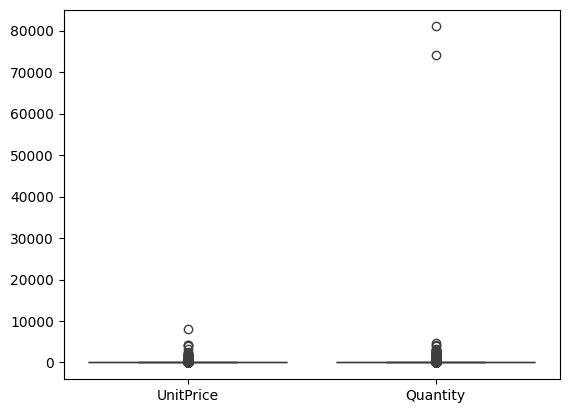

In [209]:
# Verificando dados muito dispersos da maioria média dos valores das colunas
# e eliminando de acordo com a faixa dos respectivos numerais
sns.boxplot(data[['UnitPrice', 'Quantity']])

In [210]:
data = data.query('Quantity <= 10000 & UnitPrice <= 5000 ')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


#Etapa 07 - Criar uma coluna adicional

In [211]:
# Adicionando uma coluna de preço total para análises mais valiosas
data['TotalPrice'] = data.UnitPrice * data.Quantity
data.sort_values(by='InvoiceDate', ascending=False)

<ipython-input-211-a26fe07fb6ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data.UnitPrice * data.Quantity


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680,France,15.60
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680,France,15.00
...,...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50


#Etapa 08 - Última data


In [212]:
# Coletando valor da data mais recente de compra para análise comparativa futura
UltDate = data['InvoiceDate'].max()
UltDate

Timestamp('2011-12-09 12:50:00')

#Etapa 09 - Plotando gráficos


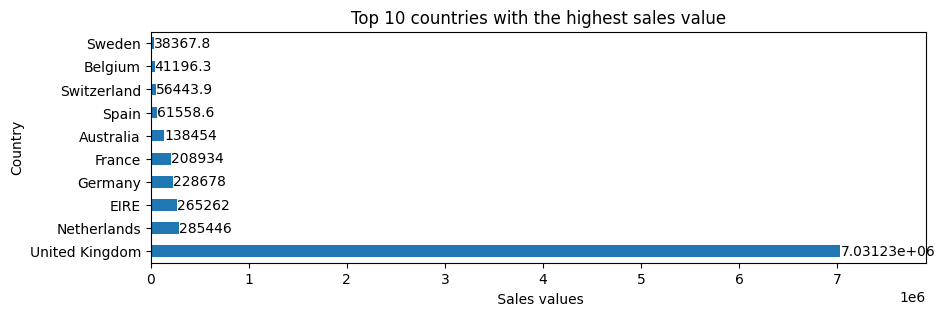

In [213]:
#Top 10 países com maior valor em vendas
Maior_Vnd2Country = data[['TotalPrice','Country']].groupby(
  by='Country',as_index=False).agg(sum).sort_values(
  by='TotalPrice', ascending=False).head(10);
plt1 = Maior_Vnd2Country.plot(
    kind='barh',
    y='TotalPrice' ,
    x='Country',
    figsize=(10,3),
    legend=False,
    xlabel=" Sales values",
    ylabel="Country",
    title="Top 10 countries with the highest sales value",
    xlim=[0,7900000]
    )
plt1 = plt1.bar_label(plt1.containers[0])

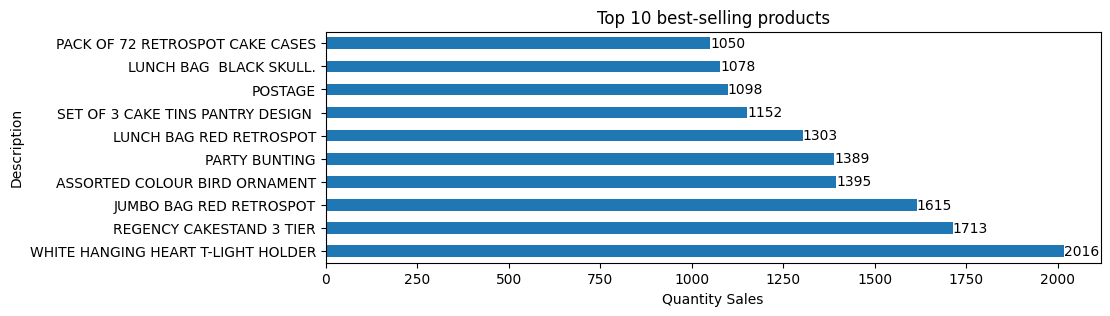

In [214]:
#Top 10 produtos mais vendidos
Mais_Vnd2Product = data[['Description','InvoiceNo']].groupby(
    by='Description', as_index=False).agg('count').sort_values(
    by='InvoiceNo', ascending=False).head(10)
plt2 = Mais_Vnd2Product.plot(
    kind='barh',
    y='InvoiceNo' ,
    x='Description',
    figsize=(10,3),
    legend=False,
    xlabel="Quantity Sales",
    ylabel="Description",
    title="Top 10 best-selling products"
    )
plt2 = plt2.bar_label(plt2.containers[0])

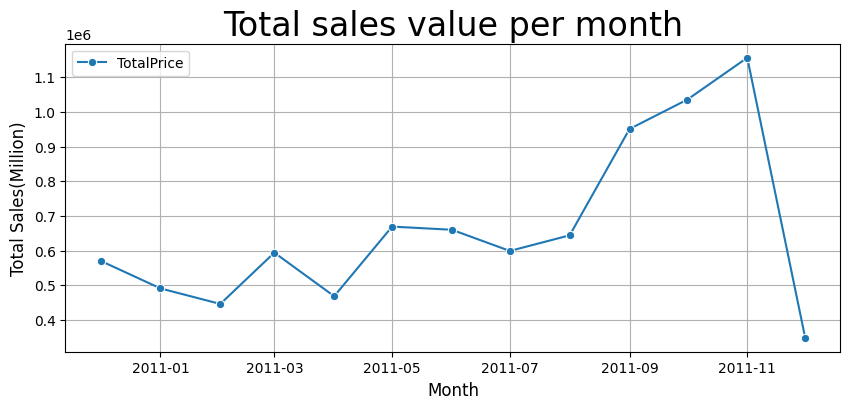

In [215]:
#Valor de venda total por mês
Vnd_Tot_Mes = data[['InvoiceDate','TotalPrice']].set_index('InvoiceDate').resample('MS').sum()
plt.figure(figsize=(10,4))
plt.grid(axis='both')
plt3 = sns.lineplot(Vnd_Tot_Mes,markers=True)
plt3.set_xlabel( "Month" , size = 12 )
plt3.set_ylabel( "Total Sales(Million)" , size = 12 )
plt3.set_title( "Total sales value per month" , size = 24 );

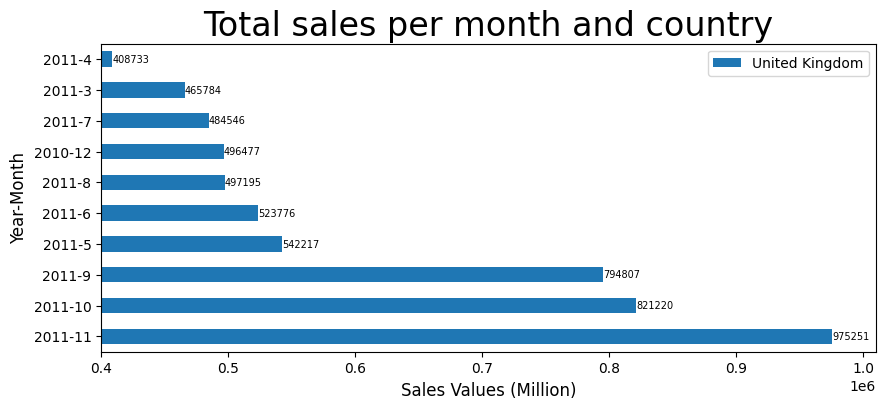

In [216]:
#Valor de venda total por mês e por país (considere apenas os top 10)
t1 = data[['InvoiceDate','TotalPrice','Country']].groupby(by=[
    data.InvoiceDate.dt.year,data.InvoiceDate.dt.month,'Country'
    ]).sum(numeric_only=True).sort_values(by='TotalPrice',ascending=False);
t1['index']=range(0,287);
t1 = t1.reset_index([1,2]).rename(columns = {'InvoiceDate':'Mes'});
t1 = t1.set_index([t1.index,'index']).reset_index([0]).rename(
    columns = {'InvoiceDate':'Ano'});
t1['x'] = t1['Ano'].map(str) + '-' + t1['Mes'].map(str);
t1plot = t1.head(10).plot(kind='barh',x='x' , y='TotalPrice',figsize=(10,4));
plt.gca().set_xlim([400000,1010000]);
t1plot.legend(t1['Country']);
t1plot.set_xlabel( "Sales Values (Million)" , size = 12 );
t1plot.set_ylabel( "Year-Month" , size = 12 );
t1plot.set_title( "Total sales per month and country" , size = 24 );
t1plot.bar_label(t1plot.containers[0],fontsize=7);

#Etapa 10 - Cálculando o RFM

In [217]:
# Captando as métricas solicitadas (Recência, Frequência e Ticket Médio)
# de cada cliente e exportando numa planilha em csv para leitura posterior
calc1 = data.groupby(by=[data.CustomerID,data.InvoiceNo,data.InvoiceDate]).sum(numeric_only=True)
calc1 = calc1.reset_index([0,1,2])
calc1R = calc1[['CustomerID','InvoiceDate']].groupby(by=calc1['CustomerID']).max()
calc1R['Recencia'] = abs((calc1['InvoiceDate'] - UltDate))
calc1R = calc1R.drop(columns=['InvoiceDate','CustomerID'])
calc1F = calc1[['CustomerID','InvoiceNo']].groupby(by=calc1['CustomerID']).count()
calc1F = calc1F.rename(columns={'InvoiceNo':'Frequencia'}).drop(columns='CustomerID')
calc1T = calc1[['CustomerID','InvoiceNo','TotalPrice']].groupby(by=[calc1['CustomerID'],calc1['InvoiceNo']]).mean(numeric_only=True)
calc1T = calc1T.drop(columns='CustomerID').reset_index([0,1]).groupby(by='CustomerID').mean(numeric_only=True)
RFM = calc1R.join(calc1F,on='CustomerID',how='inner').join(calc1T,on='CustomerID',how='inner').rename(columns={'TotalPrice':'TicketMedio'})
RFM

,Recencia,Frequencia,TicketMedio
CustomerID,,,
12347,70 days 19:23:00,7,615.714286
12348,331 days 21:08:00,4,449.310000
12349,295 days 01:59:00,1,1757.550000
12350,186 days 01:24:00,1,334.400000
12352,40 days 01:54:00,8,313.255000
...,...,...,...
18280,248 days 23:08:00,1,180.600000
18281,289 days 22:07:00,1,80.820000
18282,76 days 23:52:00,2,89.025000


In [218]:
RFM.to_csv('e-commerce_RFM.csv')

#FIM